In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

from numpy.fft import fft2,ifft2,fftshift,ifftshift
import random
from skimage import color, data
from skimage import io, transform


### Apply 2D FFT on simple apertures

##### Rectangular apertures 
with (width, height):
(50, 20) pixels
(20, 50) pixels

Here, we visualize two rectangular apertures with different width and height and their corresponding frequency sepctra in Fourier domain.

(-0.5, 99.5, 99.5, -0.5)

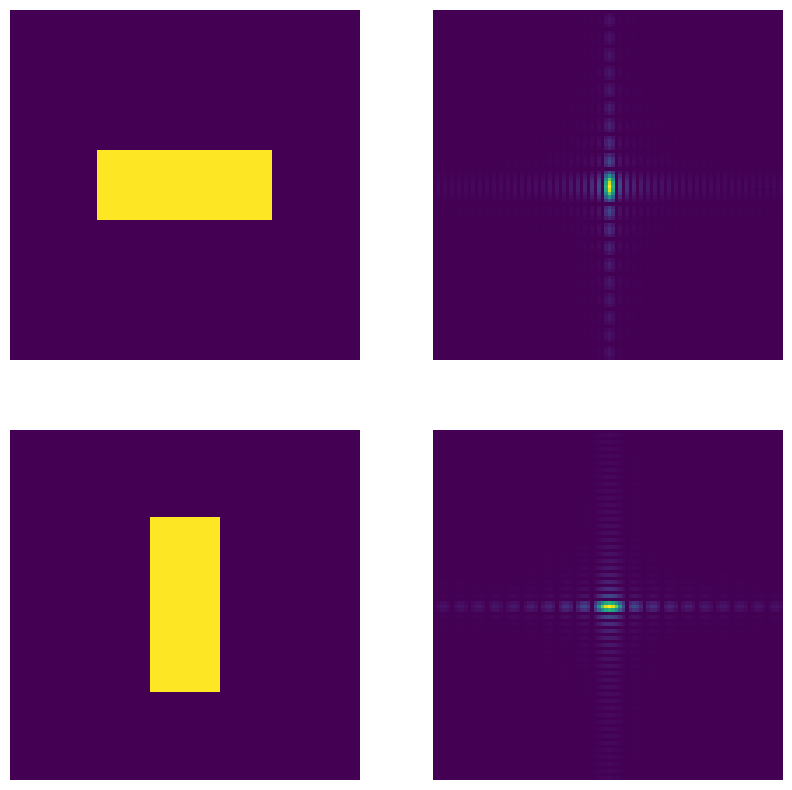

In [13]:
width1 = 50
height1 = 20
width2 = 20
height2 = 50

rec1 = np.zeros((100,100))
rec1[50 - height1//2 : 50 + height1//2, 50 - width1//2 : 50 + width1//2] = 1

rec2 = np.zeros((100,100))
rec2[50 - height2//2 : 50 + height2//2, 50 - width2//2 : 50 + width2//2] = 1

fft_rec1 = fftshift(fft2(rec1))
fft_rec2 = fftshift(fft2(rec2))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].imshow(rec1)
axs[0, 0].axis('off')

axs[0, 1].imshow(np.abs(fft_rec1))
axs[0, 1].axis('off')

axs[1, 0].imshow(rec2)
axs[1, 0].axis('off')

axs[1, 1].imshow(np.abs(fft_rec2))
axs[1, 1].axis('off')


The rectangles are translated into frequency components. The edges are observed in the Fourier spectrum as they represent abrupt change in color or intensity. Components with higher frequency will have finer details in the spatial domain.We can observe here the change in orientation between the spatial and fourier domain. This is because FT maps image into the inverse dimension.

##### Circular apertures 
with radii:
5 pixels
10 pixels
20 pixels

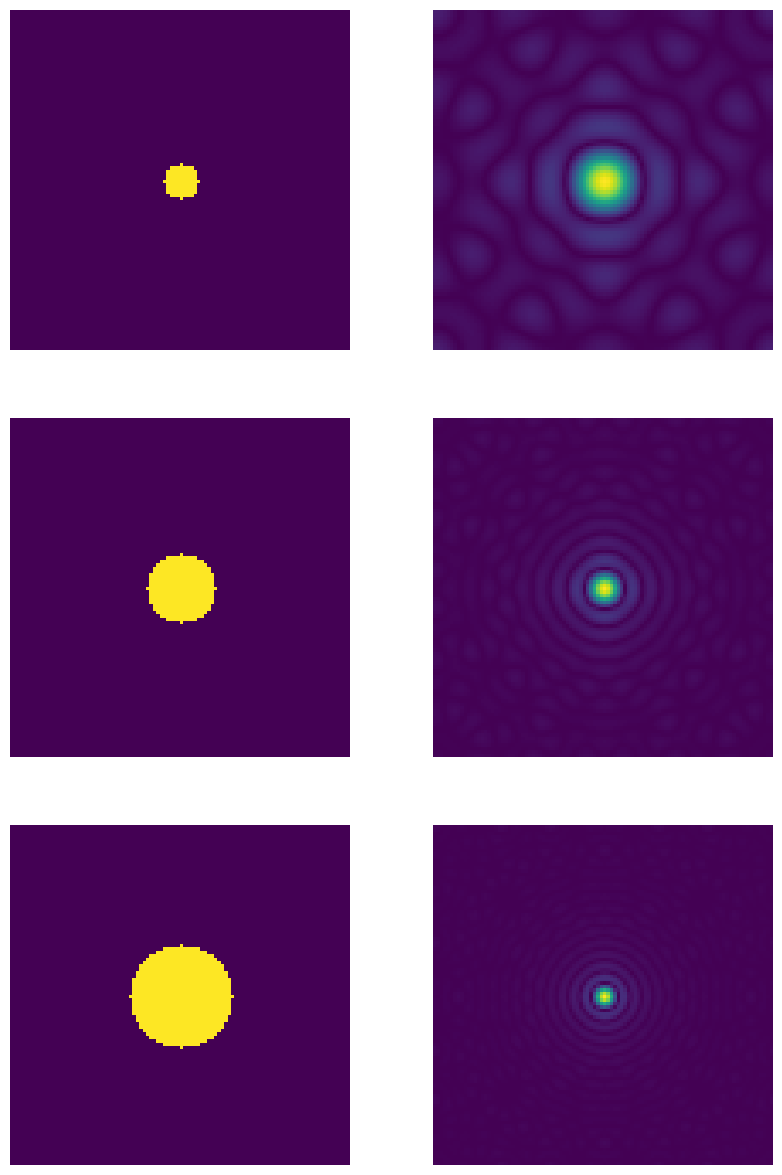

In [15]:
x = np.linspace(-50, 49, 100)
y = np.linspace(-50, 49, 100)
X,Y = np.meshgrid(x,y)

radius = [5,10,15]

circles = [np.sqrt(X**2 + Y**2) <= r for r in radius]

fft_circles = [np.abs(fftshift(fft2(circle))) for circle in circles]

fig, axs = plt.subplots(3, 2, figsize=(10,15))

for i, (circle, fft_circle) in enumerate(zip(circles, fft_circles)):
    axs[i, 0].imshow(circle)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(fft_circle, extent=(-50, 49, -50, 49))
    axs[i, 1].axis('off')

plt.show()

The circular apertures here are not perfect circles since they are made up of pixels. We can notice here that as the radius increases, the central region becomes smaller. Larger circles have smaller spatial frequency dimension

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).

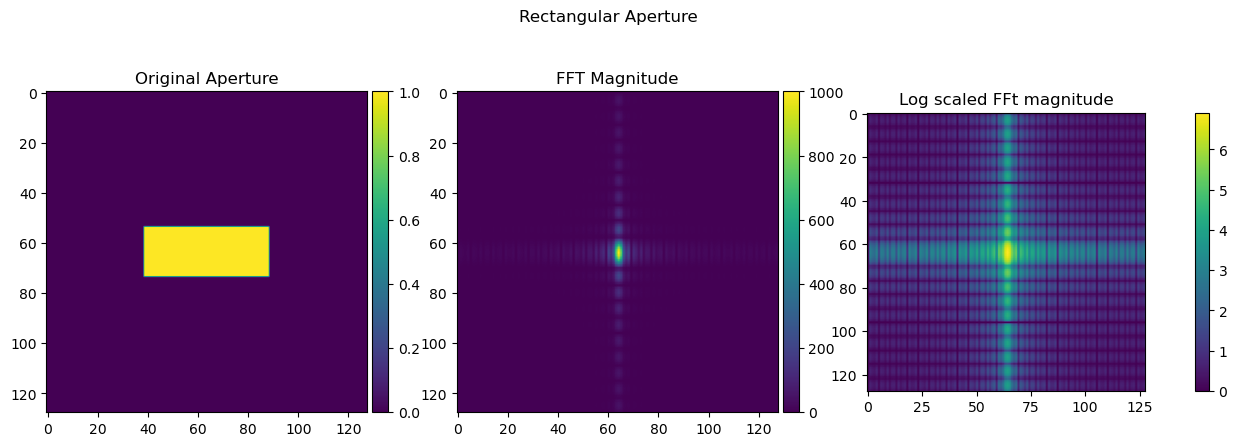

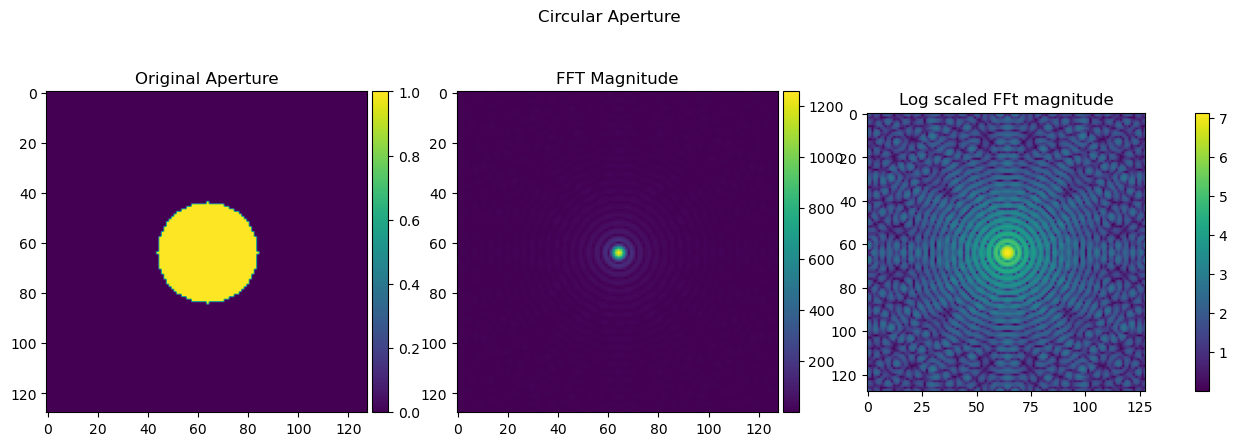

In [30]:
def rectangular_aperture(width, height, grid_size=128):
    aperture = np.zeros((grid_size, grid_size))
    x_start = (grid_size - width) // 2
    y_start = (grid_size - height) // 2
    aperture[y_start:y_start+height, x_start:x_start+width] = 1
    return aperture

def circular_aperture(radius, grid_size = 128):
    aperture = np.zeros((grid_size, grid_size))
    X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    aperture[(X - grid_size // 2)**2 + (Y - grid_size // 2)**2 <=radius**2] = 1
    return aperture

def plot_both(aperture, title):
    fig, axs = plt.subplots(1,3,figsize=(15,5))

    graph1 = axs[0].imshow(aperture)
    axs[0].set_title('Original Aperture')
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(graph1, cax=cax)

    fft_result = fftshift(fft2(aperture))
    magnitude = np.abs(fft_result)
    graph2 = axs[1].imshow(magnitude)
    axs[1].set_title('FFT Magnitude')
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(graph2, cax=cax)

    log_magnitude = np.log(1 + magnitude)
    graph3 = axs[2].imshow(log_magnitude)
    axs[2].set_title('Log scaled FFt magnitude')
    divider = make_axes_locatable(axs[2])
    cax = divider.append_axes("right", size="5%", pad=0.5)
    plt.colorbar(graph3, cax=cax)

    plt.suptitle(title)
    plt.show()


rec_width, rec_height = 50, 20
circle_radius = 20

rec_aperture = rectangular_aperture(rec_width, rec_height)
plot_both(rec_aperture, 'Rectangular Aperture')

circle_aperture = circular_aperture(circle_radius)
plot_both(circle_aperture, 'Circular Aperture')
    

The log-scaled FFt enhances the visibility of smaller magnitude values in FT. This helps in making small detais more prominent so we can identify and analyze the frequency components more. This is also advantageous for high-noise spectra.

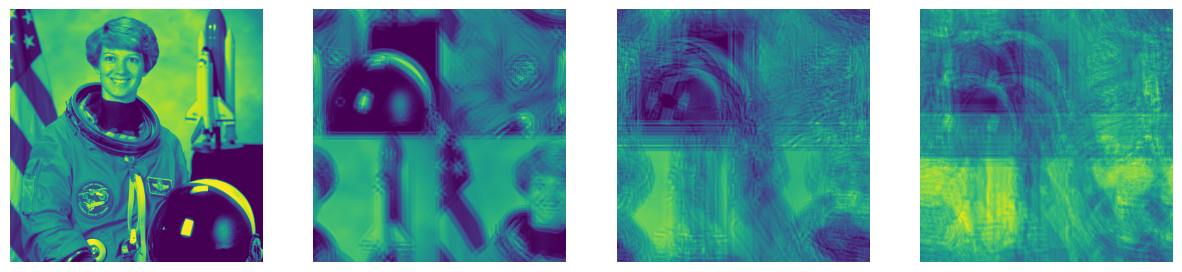

In [31]:
img = color.rgb2gray(data.astronaut())

radii = [8, 32, 64]

def circular_aperture(radius, size):
    X, Y = np.meshgrid(np.arange(size), np.arange(size))
    aperture = np.zeros((size,size))
    aperture[(X - size // 2)**2 + (Y - size // 2)**2 <= radius**2] = 1
    return aperture

img_fft = fft2(img)

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(img)
plt.axis('off')

for i, radius in enumerate(radii):

    aperture = circular_aperture(radius, img.shape[0])

    aperture_fft = fftshift(fft2(aperture))

    convolution_fft = img_fft*aperture_fft

    convolution_result = np.abs(ifft2(convolution_fft))

    plt.subplot(1,4, i+2)
    plt.imshow(convolution_result)
    plt.axis('off')

plt.show()

The circular convolution with larger apertures will lead to better smoothing of an image.

#### PART 3 - Correlation

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

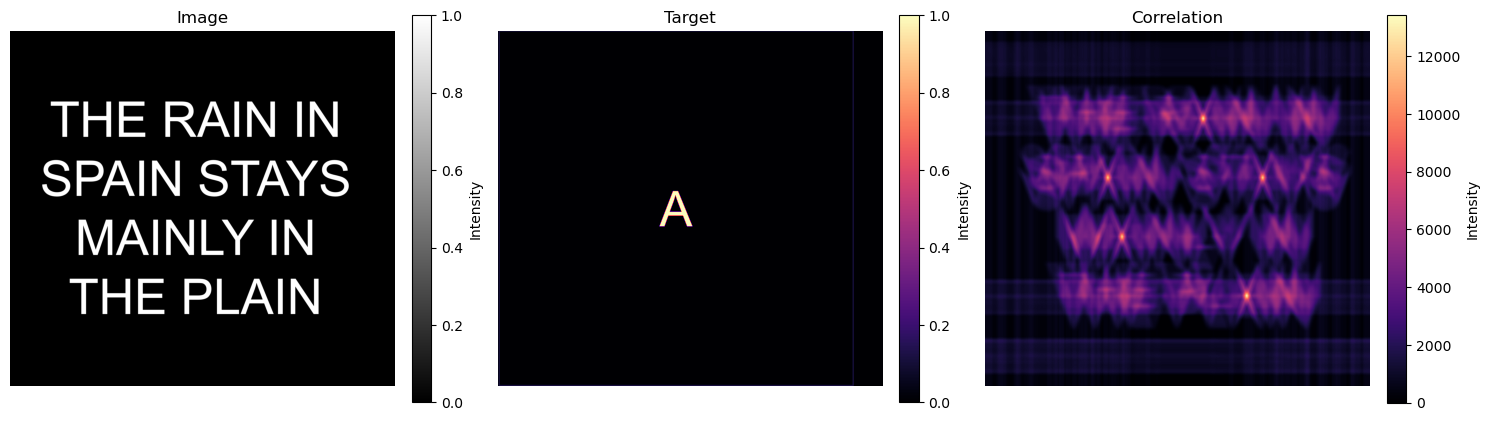

In [6]:
test_image = io.imread('test_image.png')
target_image = io.imread('target_image.png')

if test_image.shape[-1] == 4:
    test_image = test_image[:,:,:3]
if target_image.shape[-1] == 4:
    target_image = target_image[:,:,:3]

max_height = max(test_image.shape[0], target_image.shape[0])
max_width = max(test_image.shape[1], target_image.shape[1])
padded_test_image = np.pad(test_image, ((0, max_height - test_image.shape[0]), (0, max_width - test_image.shape[1]), (0,0)), mode='constant')
padded_target_image = np.pad(target_image, ((0, max_height - target_image.shape[0]), (0, max_width - target_image.shape[1]), (0, 0)), mode='constant')

test_image_gray = color.rgb2gray(padded_test_image)
target_image_gray = color.rgb2gray(padded_target_image)

test_fft = fft2(test_image_gray)
target_fft_conj = np.conj(fft2(target_image_gray))

correlation_fft = fftshift(ifft2(test_fft * target_fft_conj))

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].imshow(test_image_gray, cmap='magma')
axs[0].set_title('Image')
axs[0].axis('off')
cbar = plt.colorbar(axs[0].imshow(test_image_gray, cmap='gray'), ax=axs[0], fraction=0.046, pad=0.04)
cbar.set_label('Intensity')

axs[1].imshow(target_image_gray, cmap='magma')
axs[1].set_title('Target')
axs[1].axis('off')
cbar = plt.colorbar(axs[1].imshow(target_image_gray, cmap='magma'), ax=axs[1], fraction=0.046, pad=0.04)
cbar.set_label('Intensity')

axs[2].imshow(np.abs(correlation_fft), cmap='magma')
axs[2].set_title('Correlation')
axs[2].axis('off')
cbar = plt.colorbar(axs[2].imshow(np.abs(correlation_fft), cmap='magma'), ax=axs[2], fraction=0.046, pad=0.04)
cbar.set_label('Intensity')

plt.tight_layout()
plt.show()




The images were made sure to be RGB and they were padded with zeroes in order to match the maximum height and width between the images. These were then converted to grayscale. We then calculated the Fourier transforms and then the conjugate of the Fourier transform. By multiplying the ft of the test image with the complex conjugate of the ft of the target image, we get the correlation. 

Higher intensities mean stronger correlation. The peaks show thehigh similarity of the test and target images.

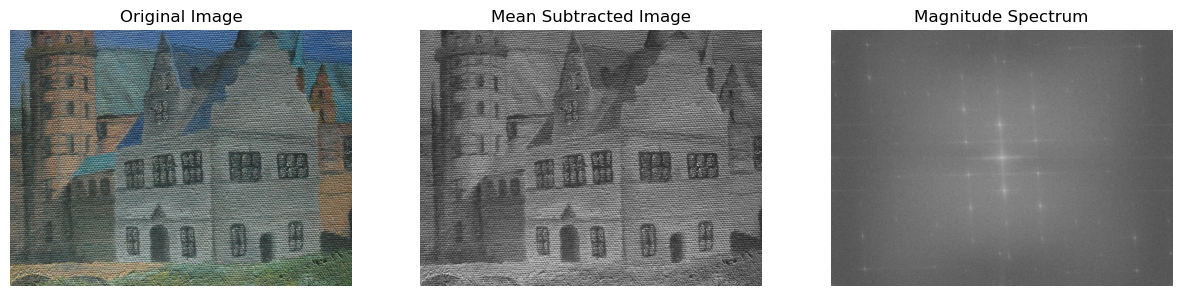

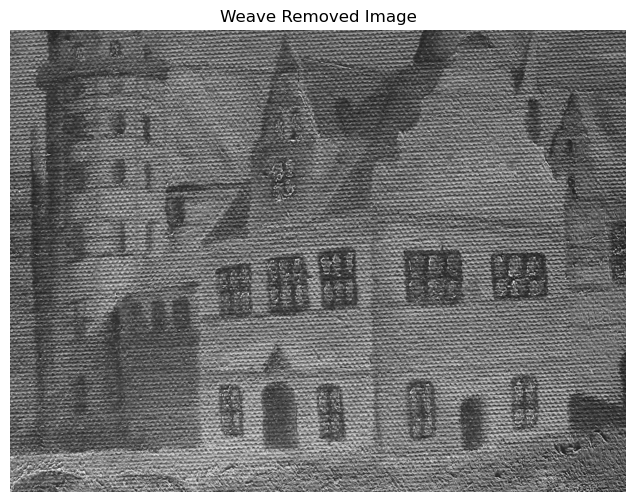

In [14]:
def remove_weave(image_path, weave_pattern_freq):
    image = io.imread(image_path)
    if image.ndim == 3:
        image = color.rgb2gray(image)

    f = fft2(image)
    fshift = fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    rows, cols = image.shape
    center_row, center_col = rows//2, cols//2

    horizontal_pattern = np.zeros_like(image)
    horizontal_pattern[center_row-1:center_row+2, :] = 1

    vertical_pattern = np.zeros_like(image)
    vertical_pattern[:, center_col-1:center_col+2] = 1

    f_weave_horizontal = fft2(horizontal_pattern)
    f_weave_vertical = fft2(vertical_pattern)

    fshift_filtered = fshift.copy()
    fshift_filtered[np.abs(f_weave_horizontal) > weave_pattern_freq] = 0
    fshift_filtered[np.abs(f_weave_vertical) > weave_pattern_freq] = 0

    f_ishift =ifftshift(fshift_filtered)
    img_back = ifft2(f_ishift)
    img_back = np.abs(img_back)

    mean_subtracted_image = image - np.mean(image)

    return img_back, mean_subtracted_image, magnitude_spectrum

image_path = 'canvas_weave.jpg'
weave_removed_image, mean_subtracted_image, magnitude_spectrum = remove_weave(image_path, weave_pattern_freq=100)

original_image = io.imread(image_path)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mean_subtracted_image, cmap='gray')
plt.title('Mean Subtracted Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(weave_removed_image, cmap='gray')
plt.title('Weave Removed Image')
plt.axis('off')
plt.show()


The mean subtracted image highlights the weave pattern by subtracting the mean intensity value from the original imgae. If there's a peak in the Magnitude spectrum, it means that there is a presence of periodic patterns, The goal here is to remove the pattern on the original image.